In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
normal = pd.read_csv("ptbdb_normal.csv", header=None)

abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None)


combined = pd.concat( [normal, abnormal], axis=0, ignore_index=True)


In [31]:
X = combined.drop(columns=[187])
X = X.values #.values is an attribute, not a method, therefore no () needed

y = combined[187]
y = y.values

#values changes it to a numpy array, as it is an attrivbute from pandas

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11641, 187)
(2911, 187)
(11641,)
(2911,)


In [33]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(X_train_smote.shape)
print(y_train_smote.shape)

(16858, 187)
(16858,)


In [34]:
#X_train_smote = torch.FloatTensor(X_train_smote) #float as ECG data are decimals 
#y_train_smote = torch.LongTensor(y_train_smote) #labels are intrgrers, CrossEntropyLoss
                                                #requires labels to be LongTensor
#X_test = torch.FloatTensor(X_test)
#y_test = torch.LongTensor(y_test)


Train Accuracy: 100.00%
Test Accuracy: 91.45%


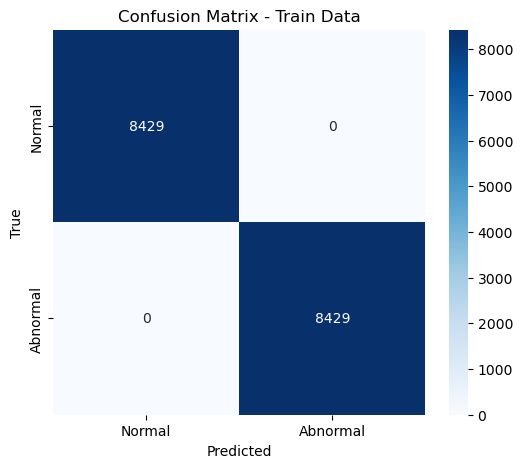

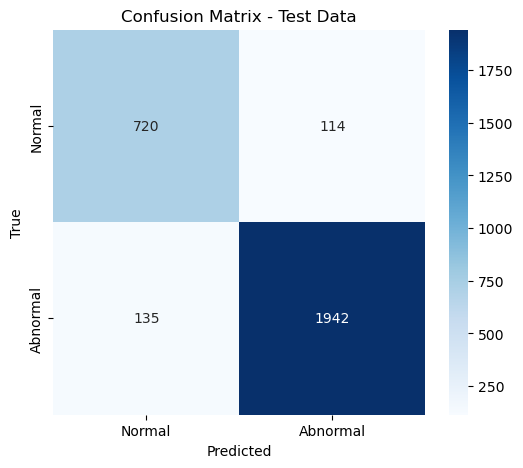

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#create an instance of desicion tree
dt_model = DecisionTreeClassifier(random_state=42)

#fit the model
dt_model.fit(X_train_smote, y_train_smote)

#predict using the model
y_train_pred = dt_model.predict(X_train_smote)
y_test_pred = dt_model.predict(X_test)

#evaluate it
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

#confusion matrix for training data
train_cm = confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Confusion Matrix - Train Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#confusion matrix for testing data
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
